Notebook where to plot the curves and display the performance of all models in 
a chosen folder. It is also where to conduct the performance analysis about the
models database.

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp

from contrastive.utils.models_database import import_bdd

In [129]:
import os

def last_part(path):
    return os.sep.join(path.rsplit(r"/")[-2:])

## HCP with top included in simple surface / UKB with top included in simple surface

In [152]:
database_path = "/neurospin/dico/jchavas/Runs/57_miccai2023_checks_done_after/Output/contrastive/summary/bdd_HCP-with-top-UkBioBank_without-top-different-n_evaluation-ACCpatterns-1.csv"
bdd = pd.read_csv(database_path, index_col=0)
bdd.sort_values(by='auc', ascending=False, inplace=True)
bdd.loc[bdd.dataset_name.str.contains("UkBioBank"), "dataset_name"] = "UKBioBank"
bdd.loc[bdd.dataset_name.str.contains("ACCpatterns"), "dataset_name"] = "ACC-1"
bdd.loc[bdd.dataset_name.str.contains("HCP"), "dataset_name"] = "HCP-2"

In [153]:
bdd.head()

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,batch_size,checkerboard_size,dataset_name,depth_decoder,...,temperature_initial,weight_decay,with_labels,exclude,pretrained_model_path,proportion_pure_contrastive,sigma_labels,temperature_supervised,train_val_csv_file,numpy_all
66,/neurospin/dico/jchavas/Runs/57_miccai2023_che...,0.781621,0.005196,0.748444,0.005917,convnet,16,4,UKBioBank,3,...,0.1,0.00005,True,False,NaN,1.0,2.0,0.3,/neurospin/dico/jchavas/Runs/52_ukbiobank/Inpu...,NaN
48,/neurospin/dico/jchavas/Runs/57_miccai2023_che...,0.780081,0.002296,0.726363,0.005141,convnet,16,4,UKBioBank,3,...,0.1,0.00005,True,False,NaN,1.0,2.0,0.3,/neurospin/dico/jchavas/Runs/52_ukbiobank/Inpu...,NaN
27,/neurospin/dico/jchavas/Runs/57_miccai2023_che...,0.772855,0.003858,0.715836,0.010503,convnet,16,4,HCP-2,3,...,0.1,0.00005,False,False,NaN,NaN,NaN,NaN,NaN,NaN
28,/neurospin/dico/jchavas/Runs/57_miccai2023_che...,0.767657,0.002842,0.713474,0.006021,convnet,16,4,HCP-2,3,...,0.1,0.00005,False,False,NaN,NaN,NaN,NaN,NaN,NaN
65,/neurospin/dico/jchavas/Runs/57_miccai2023_che...,0.767010,0.003527,0.728304,0.014748,convnet,16,4,UKBioBank,3,...,0.1,0.00005,True,False,NaN,1.0,2.0,0.3,/neurospin/dico/jchavas/Runs/52_ukbiobank/Inpu...,NaN


In [154]:
bdd = bdd.copy()
bdd["model_name"] = "=0"
bdd["model_name"] = bdd.model_path.apply(lambda x: x.split(sep='/')[-2])
bdd.loc[bdd.dataset_name=="ACC","model_name"] = "cingulate_ACCpatterns_0_n=171"
bdd.loc[bdd.model_name=="all","model_name"] = "cingulate_HCP_n=1101"
bdd.loc[bdd.model_path.str.contains("n=1101"),"model_name"] = "cingulate_UkBioBank_n=1101"
bdd["n"] = -1
bdd["n"] = bdd.model_name.apply(lambda x: int(x.split(sep='=')[-1]))
bdd["n"] = bdd.apply(lambda x: x["nb_subjects"] if x["nb_subjects"]>=0 else x["n"], axis=1)
bdd["short_model_path"] = bdd.model_path.apply(last_part)
bdd[["auc", "nb_subjects", "n", "dataset_name", "model_name", "short_model_path"]][bdd.short_model_path.str.contains("1101")].sort_values(by='n')

,auc,nb_subjects,n,dataset_name,model_name,short_model_path
27,0.772855,-1,1101,HCP-2,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_0
28,0.767657,-1,1101,HCP-2,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_2
52,0.765963,1101,1101,UKBioBank,cingulate_UkBioBank_n=1101,ukbiobank-n=1101/18-51-46_0
29,0.759345,-1,1101,HCP-2,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_3
53,0.754996,1101,1101,UKBioBank,cingulate_UkBioBank_n=1101,ukbiobank-n=1101/18-51-46_1
56,0.752281,1101,1101,UKBioBank,cingulate_UkBioBank_n=1101,ukbiobank-n=1101/18-49-19_0
55,0.749047,1101,1101,UKBioBank,cingulate_UkBioBank_n=1101,ukbiobank-n=1101/18-49-19_2
25,0.746703,-1,1101,HCP-2,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_1
26,0.738183,-1,1101,HCP-2,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_4
54,0.732928,1101,1101,UKBioBank,cingulate_UkBioBank_n=1101,ukbiobank-n=1101/18-49-19_1


(0.5, 0.8)

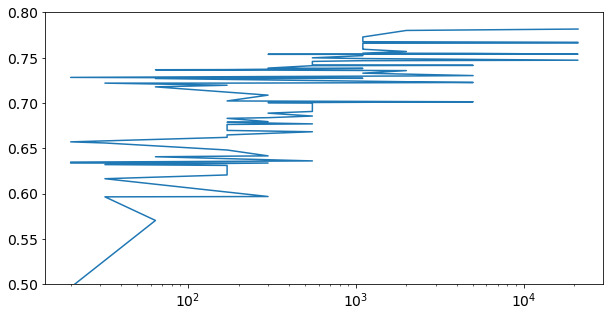

In [155]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(bdd.n, bdd.auc)
ax.set_xscale("log")
ax.set_ylim([0.5,0.8])

(0.5, 0.8)

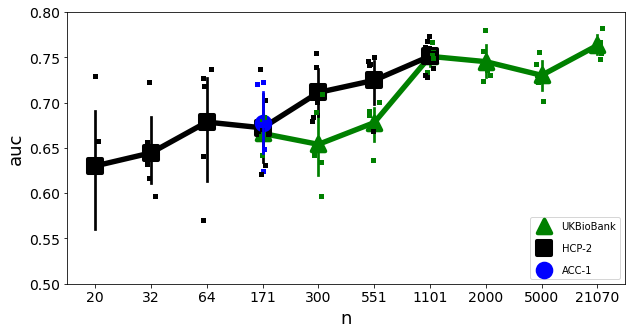

In [157]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.pointplot(data=bdd, x=bdd.n, y="auc", palette=['green', 'black', 'blue'],markers=['^', 's','o'], hue='dataset_name', linestyles=['-','-','-'], scale=2,ax=ax)
sns.stripplot(data=bdd, x=bdd.n, y="auc", marker='s', palette=['green', 'black', 'blue'], hue='dataset_name', jitter=1, ax=ax)
# ax.legend([],[], frameon=False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:3], labels=labels[0:3], labelspacing=1.2)
ax.set_ylim([0.5,0.8])
# ax.set_xscale('log')

In [158]:
bdd[bdd.n==21070]["auc"]

66    0.781621
65    0.767010
63    0.766202
64    0.753912
62    0.747245
Name: auc, dtype: float64

In [159]:
bdd[bdd.n==21070]["auc"].mean()

0.7631981548783897

In [160]:
bdd_UK_top_included = bdd.copy(deep=True)

## HCP with top included in simple surface / UKBioBank with top as separated branches

In [161]:
database_path = "/neurospin/dico/jchavas/Runs/57_miccai2023_checks_done_after/Output/contrastive/summary/bdd_HCP-UkBioBank-with-top_different-n_evaluation-ACCpatterns-1.csv"
bdd = pd.read_csv(database_path, index_col=0)
bdd.sort_values(by='auc', ascending=False, inplace=True)
bdd.loc[bdd.dataset_name.str.contains("UkBioBank"), "dataset_name"] = "UKBioBank"
bdd.loc[bdd.dataset_name.str.contains("ACCpatterns"), "dataset_name"] = "ACC-1"
bdd.loc[bdd.dataset_name.str.contains("HCP"), "dataset_name"] = "HCP-2"

In [162]:
bdd[bdd["nb_subjects"]==10000]["nb_subjects"]

66    10000
67    10000
68    10000
Name: nb_subjects, dtype: int64

In [163]:
bdd = bdd.copy()
bdd["model_name"] = "=0"
bdd["model_name"] = bdd.model_path.apply(lambda x: x.split(sep='/')[-2])
bdd.loc[bdd.dataset_name=="ACC","model_name"] = "cingulate_ACCpatterns_0_n=171"
bdd.loc[bdd.model_name=="all","model_name"] = "cingulate_HCP_n=1101"
bdd.loc[bdd.model_path.str.contains("n=1114"),"model_name"] = "cingulate_UkBioBank_n=1101"
bdd.loc[bdd.model_path.str.contains("n=1101"),"model_name"] = "cingulate_UkBioBank_n=1101"
bdd["n"] = -1
bdd["n"] = bdd.model_name.apply(lambda x: int(x.split(sep='=')[-1]))
bdd["n"] = bdd.apply(lambda x: x["nb_subjects"] if x["nb_subjects"]>=0 else x["n"], axis=1)
bdd["short_model_path"] = bdd.model_path.apply(last_part)
bdd[["auc", "nb_subjects", "n", "dataset_name", "model_name", "short_model_path"]][bdd.short_model_path.str.contains("1101")].sort_values(by='n')

,auc,nb_subjects,n,dataset_name,model_name,short_model_path
27,0.772855,-1,1101,HCP-2,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_0
28,0.767657,-1,1101,HCP-2,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_2
29,0.759345,-1,1101,HCP-2,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_3
25,0.746703,-1,1101,HCP-2,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_1
26,0.738183,-1,1101,HCP-2,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_4


In [164]:
bdd = bdd[bdd["nb_subjects"] != 10000].copy(deep=True)


(0.5, 0.8)

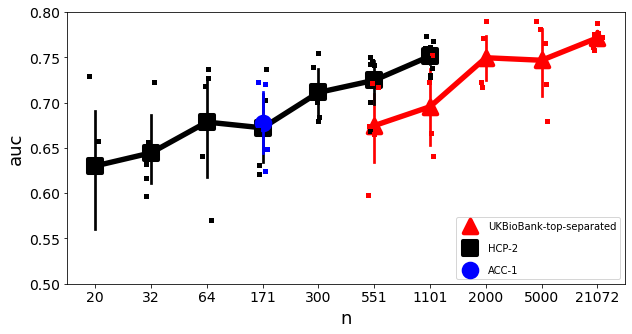

In [167]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.pointplot(data=bdd, x=bdd.n, y="auc", palette=['red', 'black', 'blue'],markers=['^', 's','o'], hue='dataset_name', linestyles=['-','-','-'], scale=2,ax=ax)
sns.stripplot(data=bdd, x=bdd.n, y="auc", marker='s', palette=['red', 'black', 'blue'], hue='dataset_name', jitter=1, ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:3], labels=["UKBioBank-top-separated", "HCP-2", "ACC-1"], labelspacing=1.2)
# ax.legend([],[], frameon=False)
ax.set_ylim([0.5,0.8])
# ax.set_xscale('log')

In [143]:
bdd[bdd.n==21072]["auc"].mean()

0.7714771223557917

In [144]:
bdd_UK_top_separated = bdd.copy(deep=True)

## Bringing together

In [145]:
bdd_UK_top_separated.loc[bdd_UK_top_separated.dataset_name=="UKBioBank", "dataset_name"] = "UKBioBank-top-separated"
bdd_UK_top_separated.head()

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,batch_size,checkerboard_size,dataset_name,depth_decoder,...,exclude,pretrained_model_path,proportion_pure_contrastive,sigma_labels,temperature_supervised,train_val_csv_file,numpy_all,model_name,n,short_model_path
51,/neurospin/dico/jchavas/Runs/57_miccai2023_che...,0.789846,0.003747,0.718620,0.005355,convnet,16,4,UKBioBank-top-separated,3,...,False,NaN,NaN,NaN,NaN,NaN,/home_local/jc225751/Runs/52_ukbiobank/Input/U...,ukbiobank-n=2000,2000,ukbiobank-n=2000/13-06-49_1
56,/neurospin/dico/jchavas/Runs/57_miccai2023_che...,0.789371,0.003742,0.747696,0.007748,convnet,16,4,UKBioBank-top-separated,3,...,False,NaN,NaN,NaN,NaN,NaN,/home_local/jc225751/Runs/52_ukbiobank/Input/U...,ukbiobank-n=5000,5000,ukbiobank-n=5000/21-51-48_3
74,/neurospin/dico/jchavas/Runs/57_miccai2023_che...,0.786764,0.002701,0.745404,0.006901,convnet,16,4,UKBioBank-top-separated,3,...,False,NaN,NaN,NaN,NaN,NaN,/home_local/jc225751/Runs/52_ukbiobank/Input/U...,ukbiobank-n=21072,21072,ukbiobank-n=21072/22-11-20_0
57,/neurospin/dico/jchavas/Runs/57_miccai2023_che...,0.780615,0.002661,0.721450,0.011685,convnet,16,4,UKBioBank-top-separated,3,...,False,NaN,NaN,NaN,NaN,NaN,/home_local/jc225751/Runs/52_ukbiobank/Input/U...,ukbiobank-n=5000,5000,ukbiobank-n=5000/21-51-48_2
73,/neurospin/dico/jchavas/Runs/57_miccai2023_che...,0.776145,0.004466,0.724772,0.008807,convnet,16,4,UKBioBank-top-separated,3,...,False,NaN,NaN,NaN,NaN,NaN,/neurospin/dico/data/deep_folding/current/data...,ukbiobank-n=21072,21072,ukbiobank-n=21072/1


In [146]:
bdd_all = bdd_UK_top_separated.copy(deep=True)

In [147]:
print(set(bdd_all["dataset_name"]))
print(len(bdd_all))

{'HCP-2', 'UKBioBank-top-separated', 'ACC-1'}
72


In [148]:
bdd_all = pd.concat([bdd_all, bdd_UK_top_included[bdd_UK_top_included.dataset_name=="UKBioBank"]])

In [149]:
print(set(bdd_all["dataset_name"]))
print(len(bdd_all))

{'HCP-2', 'UKBioBank-top-separated', 'UKBioBank', 'ACC-1'}
107


In [150]:
bdd_all.loc[bdd_all.n==21072, "n"] = 21070

(0.5, 0.8)

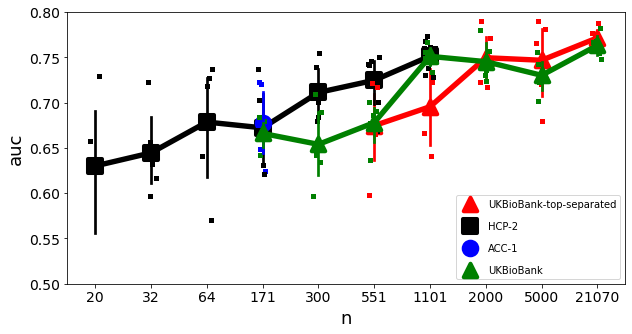

In [151]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(10, 5))
line = sns.pointplot(data=bdd_all, x=bdd_all.n, y="auc", palette=['red', 'black', 'blue', 'green'],markers=['^', 's','o', '^'], hue='dataset_name', linestyles=['-','-','-','-'], scale=2,ax=ax)
sns.stripplot(data=bdd_all, x=bdd_all.n, y="auc", marker='s', palette=['red', 'black', 'blue', 'green'], hue='dataset_name', jitter=1, ax=ax)
# ax.legend([],[], frameon=False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:4], labels=labels[0:4], labelspacing=1.2)
ax.set_ylim([0.5,0.8])
# ax.set_xscale('log')